In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.datasets import load_iris
from tensorflow.keras.utils import to_categorical

In [10]:
dataset = load_iris()

print(dataset.keys())
print(dataset.feature_names)
print(dataset.target)
print(dataset.target_names)
print(len(dataset.data))

dict_keys(['feature_names', 'DESCR', 'data', 'filename', 'target_names', 'target'])
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']
150


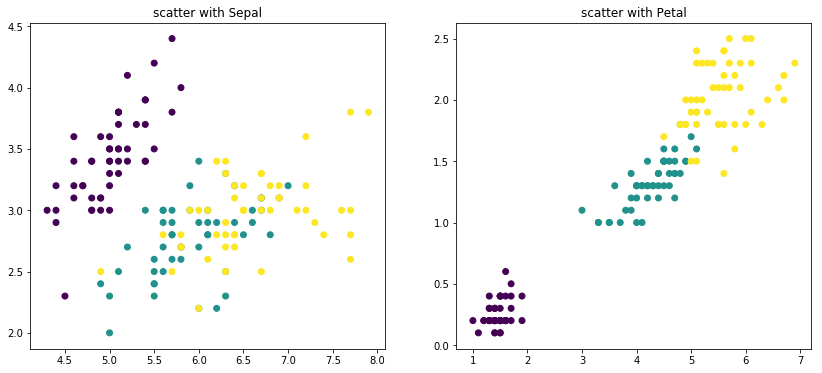

In [3]:
f, ax = plt.subplots(1, 2, figsize=(14,6))
ax[0].scatter(dataset.data[:,0], dataset.data[:,1], c=dataset.target)
ax[0].set_title('scatter with Sepal')
ax[1].scatter(dataset.data[:,2], dataset.data[:,3], c=dataset.target)
ax[1].set_title('scatter with Petal')
plt.show()

In [4]:
dataset_y = to_categorical(dataset.target)
print(dataset_y)

dataset_y = np.array(dataset_y, dtype=np.int32)
print(dataset_y)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0.

In [5]:
x = [[1,1,1],[2,2,2],[3,3,3],[4,4,4],[5,5,5]]
y = [[1],[2],[3],[4],[5]]

x, y = shuffle(x, y)

print(x)
print(y)

[[4, 4, 4], [5, 5, 5], [1, 1, 1], [3, 3, 3], [2, 2, 2]]
[[4], [5], [1], [3], [2]]


In [6]:
dataset_x = dataset.data
dataset_x, dataset_y = shuffle(dataset_x, dataset_y)

In [7]:
train_x = dataset_x[:120,]
test_x = dataset_x[120:,]

train_y = dataset_y[:120,]
test_y = dataset_y[120:,]

In [8]:
class IrisModel():
    def __init__(self):
        self.epochs = 200
        self.learning_rate = 0.04

    def buildModel(self):
        self.model = tf.keras.Sequential()
        self.model.add(tf.keras.layers.Dense(3, activation='softmax'))

        optimizer = tf.keras.optimizers.SGD(learning_rate=self.learning_rate)

        self.model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [9]:
    def fitModel(self, x, y):
        hist = self.model.fit(x, y, epochs=self.epochs, batch_size=10, shuffle=True)
        return hist

    def evaluateModel(self, x, y):
        self.model.evaluate(x, y)

model = IrisModel()
model.buildModel()
hist = model.fitModel(train_x, train_y)

AttributeError: 'IrisModel' object has no attribute 'fitModel'

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['accuracy'])
plt.show()

In [ ]:
model.evaluateModel(test_x, test_y)